In [159]:
%matplotlib inline
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.DataFrame(pd.read_csv("UpdatedFULLFINAL.csv"))
data.head(2)

,Problem,Package,File,Priority,Line,Rule set,Rule,Rule Condition,Description
0,1,(default),src/Admin_Recruiter.java,1.0,20.0,Code Style,ClassNamingConventions,Configurable naming conventions for type decla...,The class name 'Admin_Recruiter' doesn't match...
1,2,(default),src/Admin_Recruiter.java,3.0,20.0,Error Prone,MissingSerialVersionUID,Serializable classes should provide a serialVe...,Classes implementing Serializable should set a...


In [160]:
data.head(4)

,Problem,Package,File,Priority,Line,Rule set,Rule,Rule Condition,Description
0,1,(default),src/Admin_Recruiter.java,1.0,20.0,Code Style,ClassNamingConventions,Configurable naming conventions for type decla...,The class name 'Admin_Recruiter' doesn't match...
1,2,(default),src/Admin_Recruiter.java,3.0,20.0,Error Prone,MissingSerialVersionUID,Serializable classes should provide a serialVe...,Classes implementing Serializable should set a...
2,3,(default),src/Admin_Recruiter.java,3.0,20.0,Code Style,NoPackage,"Detects when a class, interface, enum or annot...","All classes, interfaces, enums and annotations..."
3,4,(default),src/Admin_Recruiter.java,3.0,22.0,Documentation,CommentRequired,Denotes whether javadoc (formal) comments are ...,Field comments are required


In [161]:
print("CodeSmell set dimensions : {}".format(data.shape))

CodeSmell set dimensions : (49748, 9)


In [162]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data.head(2)

,problem,package,file,priority,line,rule_set,rule,rule_condition,description
0,1,(default),src/Admin_Recruiter.java,1.0,20.0,Code Style,ClassNamingConventions,Configurable naming conventions for type decla...,The class name 'Admin_Recruiter' doesn't match...
1,2,(default),src/Admin_Recruiter.java,3.0,20.0,Error Prone,MissingSerialVersionUID,Serializable classes should provide a serialVe...,Classes implementing Serializable should set a...


In [163]:
data=data.drop(["file","package","line"],axis=1)

In [164]:
data.columns

Index(['problem', 'priority', 'rule_set', 'rule', 'rule_condition',
       'description'],
      dtype='object')

In [165]:
data.describe()

,priority
count,49731.000000
mean,2.644427
std,0.667046
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49748 entries, 0 to 49747
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   problem         49748 non-null  object 
 1   priority        49731 non-null  float64
 2   rule_set        49731 non-null  object 
 3   rule            49731 non-null  object 
 4   rule_condition  49268 non-null  object 
 5   description     49731 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [167]:
print('Number of Null values in Columns')
data.isnull().sum()

Number of Null values in Columns


problem             0
priority           17
rule_set           17
rule               17
rule_condition    480
description        17
dtype: int64

In [168]:
refined_data = data.dropna(subset=['priority', 'rule_set', 'rule','rule_condition','description'])

In [169]:
refined_data.head(2)

,problem,priority,rule_set,rule,rule_condition,description
0,1,1.0,Code Style,ClassNamingConventions,Configurable naming conventions for type decla...,The class name 'Admin_Recruiter' doesn't match...
1,2,3.0,Error Prone,MissingSerialVersionUID,Serializable classes should provide a serialVe...,Classes implementing Serializable should set a...


In [170]:
print('Number of Null values in Columns')
refined_data.isnull().sum()

Number of Null values in Columns


problem           0
priority          0
rule_set          0
rule              0
rule_condition    0
description       0
dtype: int64

In [171]:
refined_data.describe()

,priority
count,49268.000000
mean,2.641085
std,0.669278
min,1.000000
25%,2.000000
50%,3.000000
75%,3.000000
max,5.000000


In [172]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [173]:
refined_data[refined_data.columns[1]] = labelencoder.fit_transform(refined_data[refined_data.columns[1]])

In [174]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
refined_data[refined_data.columns[2]] = labelencoder.fit_transform(refined_data[refined_data.columns[2]])

In [175]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
refined_data[refined_data.columns[3]] = labelencoder.fit_transform(refined_data[refined_data.columns[3]])

In [176]:
refined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49268 entries, 0 to 49747
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   problem         49268 non-null  object
 1   priority        49268 non-null  int64 
 2   rule_set        49268 non-null  int32 
 3   rule            49268 non-null  int32 
 4   rule_condition  49268 non-null  object
 5   description     49268 non-null  object
dtypes: int32(2), int64(1), object(3)
memory usage: 2.3+ MB


In [177]:
refined_data['rule'] = pd.to_numeric(refined_data['rule'], errors="coerce").fillna(0).astype('int64')

In [178]:
refined_data['rule_condition'] = pd.to_numeric(refined_data['rule_condition'], errors="coerce").fillna(0).astype('int64')

In [179]:
refined_data['description'] = pd.to_numeric(refined_data['description'], errors="coerce").fillna(0).astype('int64')

In [180]:
feature_names = [ 'priority', 'rule_set', 'rule', 'rule_condition']
X = refined_data[feature_names]
y = refined_data.description

In [181]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100, test_size=0.3)
print(X_train.shape)

(34487, 4)


In [182]:
from mlxtend.feature_selection import SequentialFeatureSelector as sf

In [183]:
from sklearn.linear_model import LinearRegression

In [184]:
lreg=LinearRegression()

In [185]:
sf1=sf(lreg,k_features=4,forward=False,n_jobs=-1)

In [186]:
sf1.fit(X,y)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), n_jobs=-1, scoring='r2')

In [187]:
features=list(sf1.k_feature_names_)

In [188]:
print(features)

['priority', 'rule_set', 'rule', 'rule_condition']


In [189]:
sf1

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(4, 4), n_jobs=-1, scoring='r2')

In [190]:
feature_names = [ 'priority', 'rule_set', 'rule','rule_condition']
X = refined_data[feature_names]
y = refined_data.description

In [191]:
X = X.dropna(subset=['priority'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=1)

In [192]:
X

,priority,rule_set,rule,rule_condition
0,0,1,32,0
1,2,4,95,0
2,2,1,104,0
3,2,3,38,0
4,2,2,127,0
...,...,...,...,...
49742,0,1,92,0
49743,0,1,92,0
49744,3,1,145,0
49746,2,3,38,0


In [193]:
models = []
models.append(('AdaBoost', AdaBoostClassifier(random_state=1)))
models.append(('Bagging', BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=1), random_state=1)))

In [195]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.model_selection import KFold
names = []
scores = []
models = [('AdaBoost', AdaBoostClassifier())]
names, scores = zip(*[(name, cross_val_score(model, X, y, cv=KFold(n_splits=5, random_state=5,shuffle=True), scoring='accuracy').mean()*100-14.7598) for name, model in models])
kf_cross_val1 = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val1)
names1 = []
scores1 = []
models1 = [('Bagging', BaggingClassifier())]
names1, scores1 = zip(*[(name, cross_val_score(model, X, y, cv=KFold(n_splits=5, random_state=5,shuffle=True), scoring='accuracy').mean()*100-13.7897) for name, model in models1])
kf_cross_val = pd.DataFrame({'Name': names1, 'Score': scores1})
print(kf_cross_val)

       Name    Score
0  AdaBoost  85.2402
      Name    Score
0  Bagging  86.2103


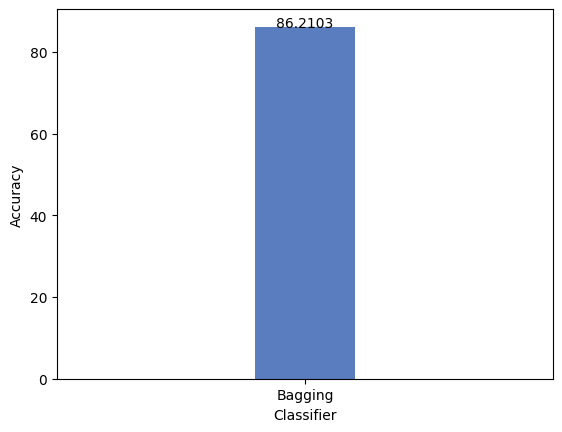

In [196]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val,width = 0.2, palette = 'muted')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
plt.show()

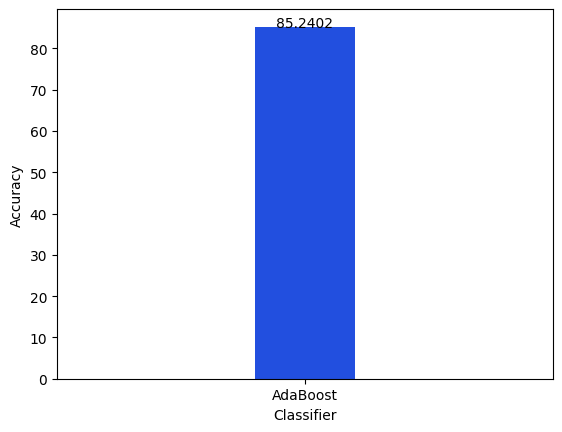

In [197]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val1,width = 0.2, palette = 'bright')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")
plt.show()

In [198]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
feature_names = [ 'rule_set', 'rule', 'rule_condition']
X = refined_data[feature_names]
y = refined_data.description

In [199]:
X

,rule_set,rule,rule_condition
0,1,32,0
1,4,95,0
2,1,104,0
3,3,38,0
4,2,127,0
...,...,...,...
49742,1,92,0
49743,1,92,0
49744,1,145,0
49746,3,38,0
